# Importing Libraries


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Data Collection

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Handling Missing Data

In [8]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

# Data Visualization

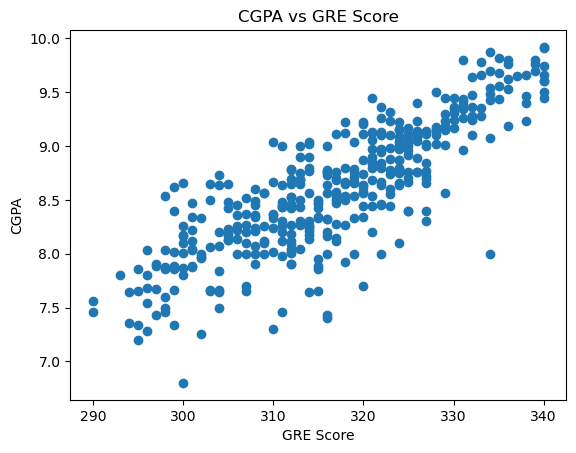

In [9]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

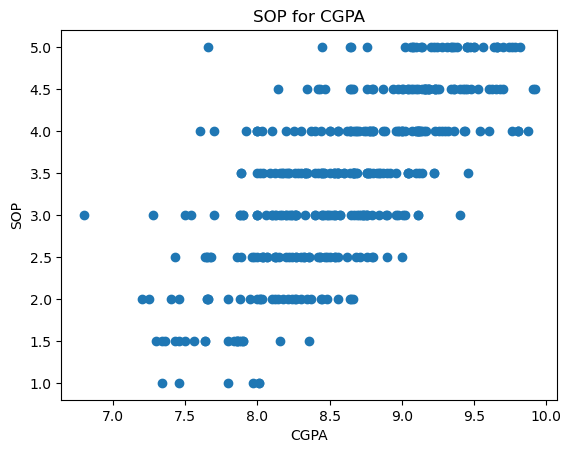

In [10]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

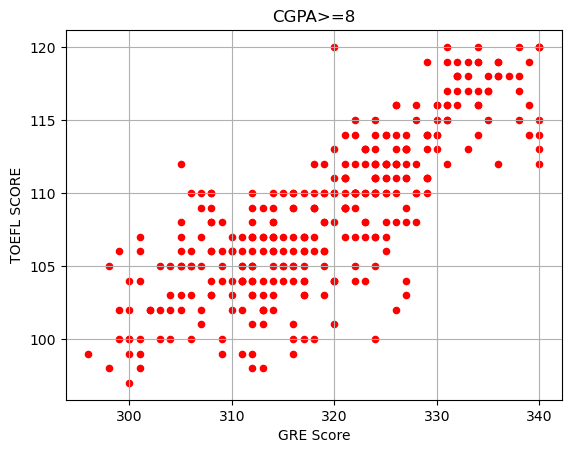

In [12]:
data[data.CGPA >= 8].plot(kind='scatter',x='GRE Score', y='TOEFL Score',color='Red')
plt.title('CGPA>=8')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL SCORE')
plt.grid(True)
plt.show()


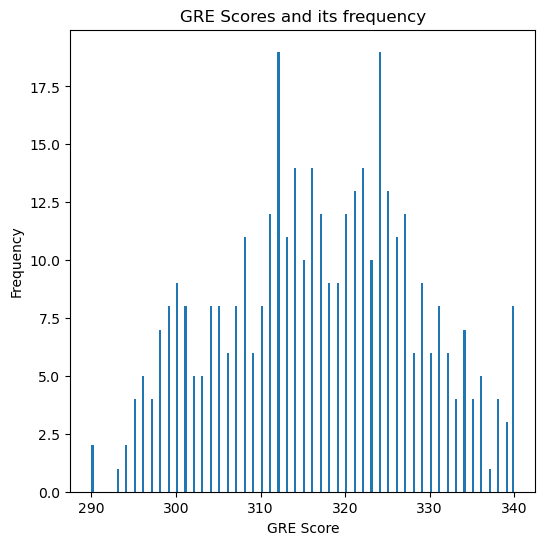

In [18]:
data["GRE Score"].plot(kind= 'hist',bins= 200,figsize= (6,6))
plt.title("GRE Scores and its frequency")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

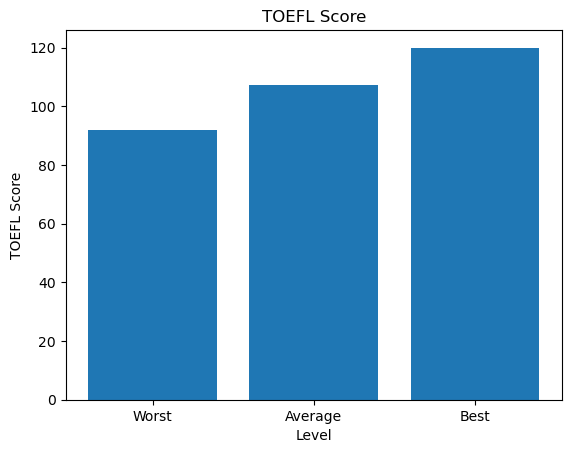

In [23]:
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Score")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

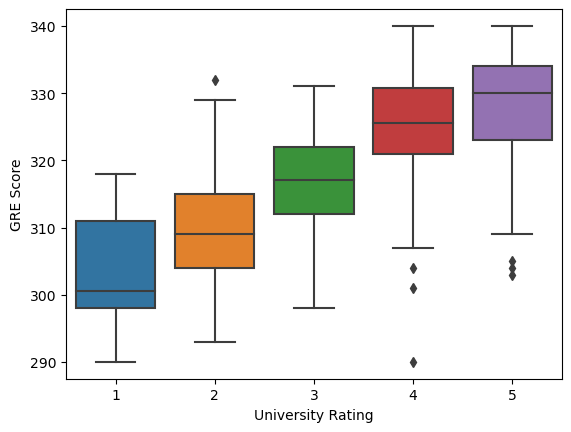

In [25]:
sns.boxplot(x="University Rating",y="GRE Score",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

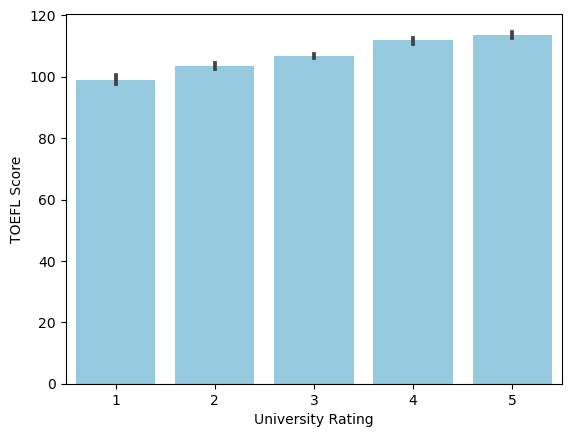

In [30]:
sns.barplot(x="University Rating",y="TOEFL Score",data=data,color="Skyblue")

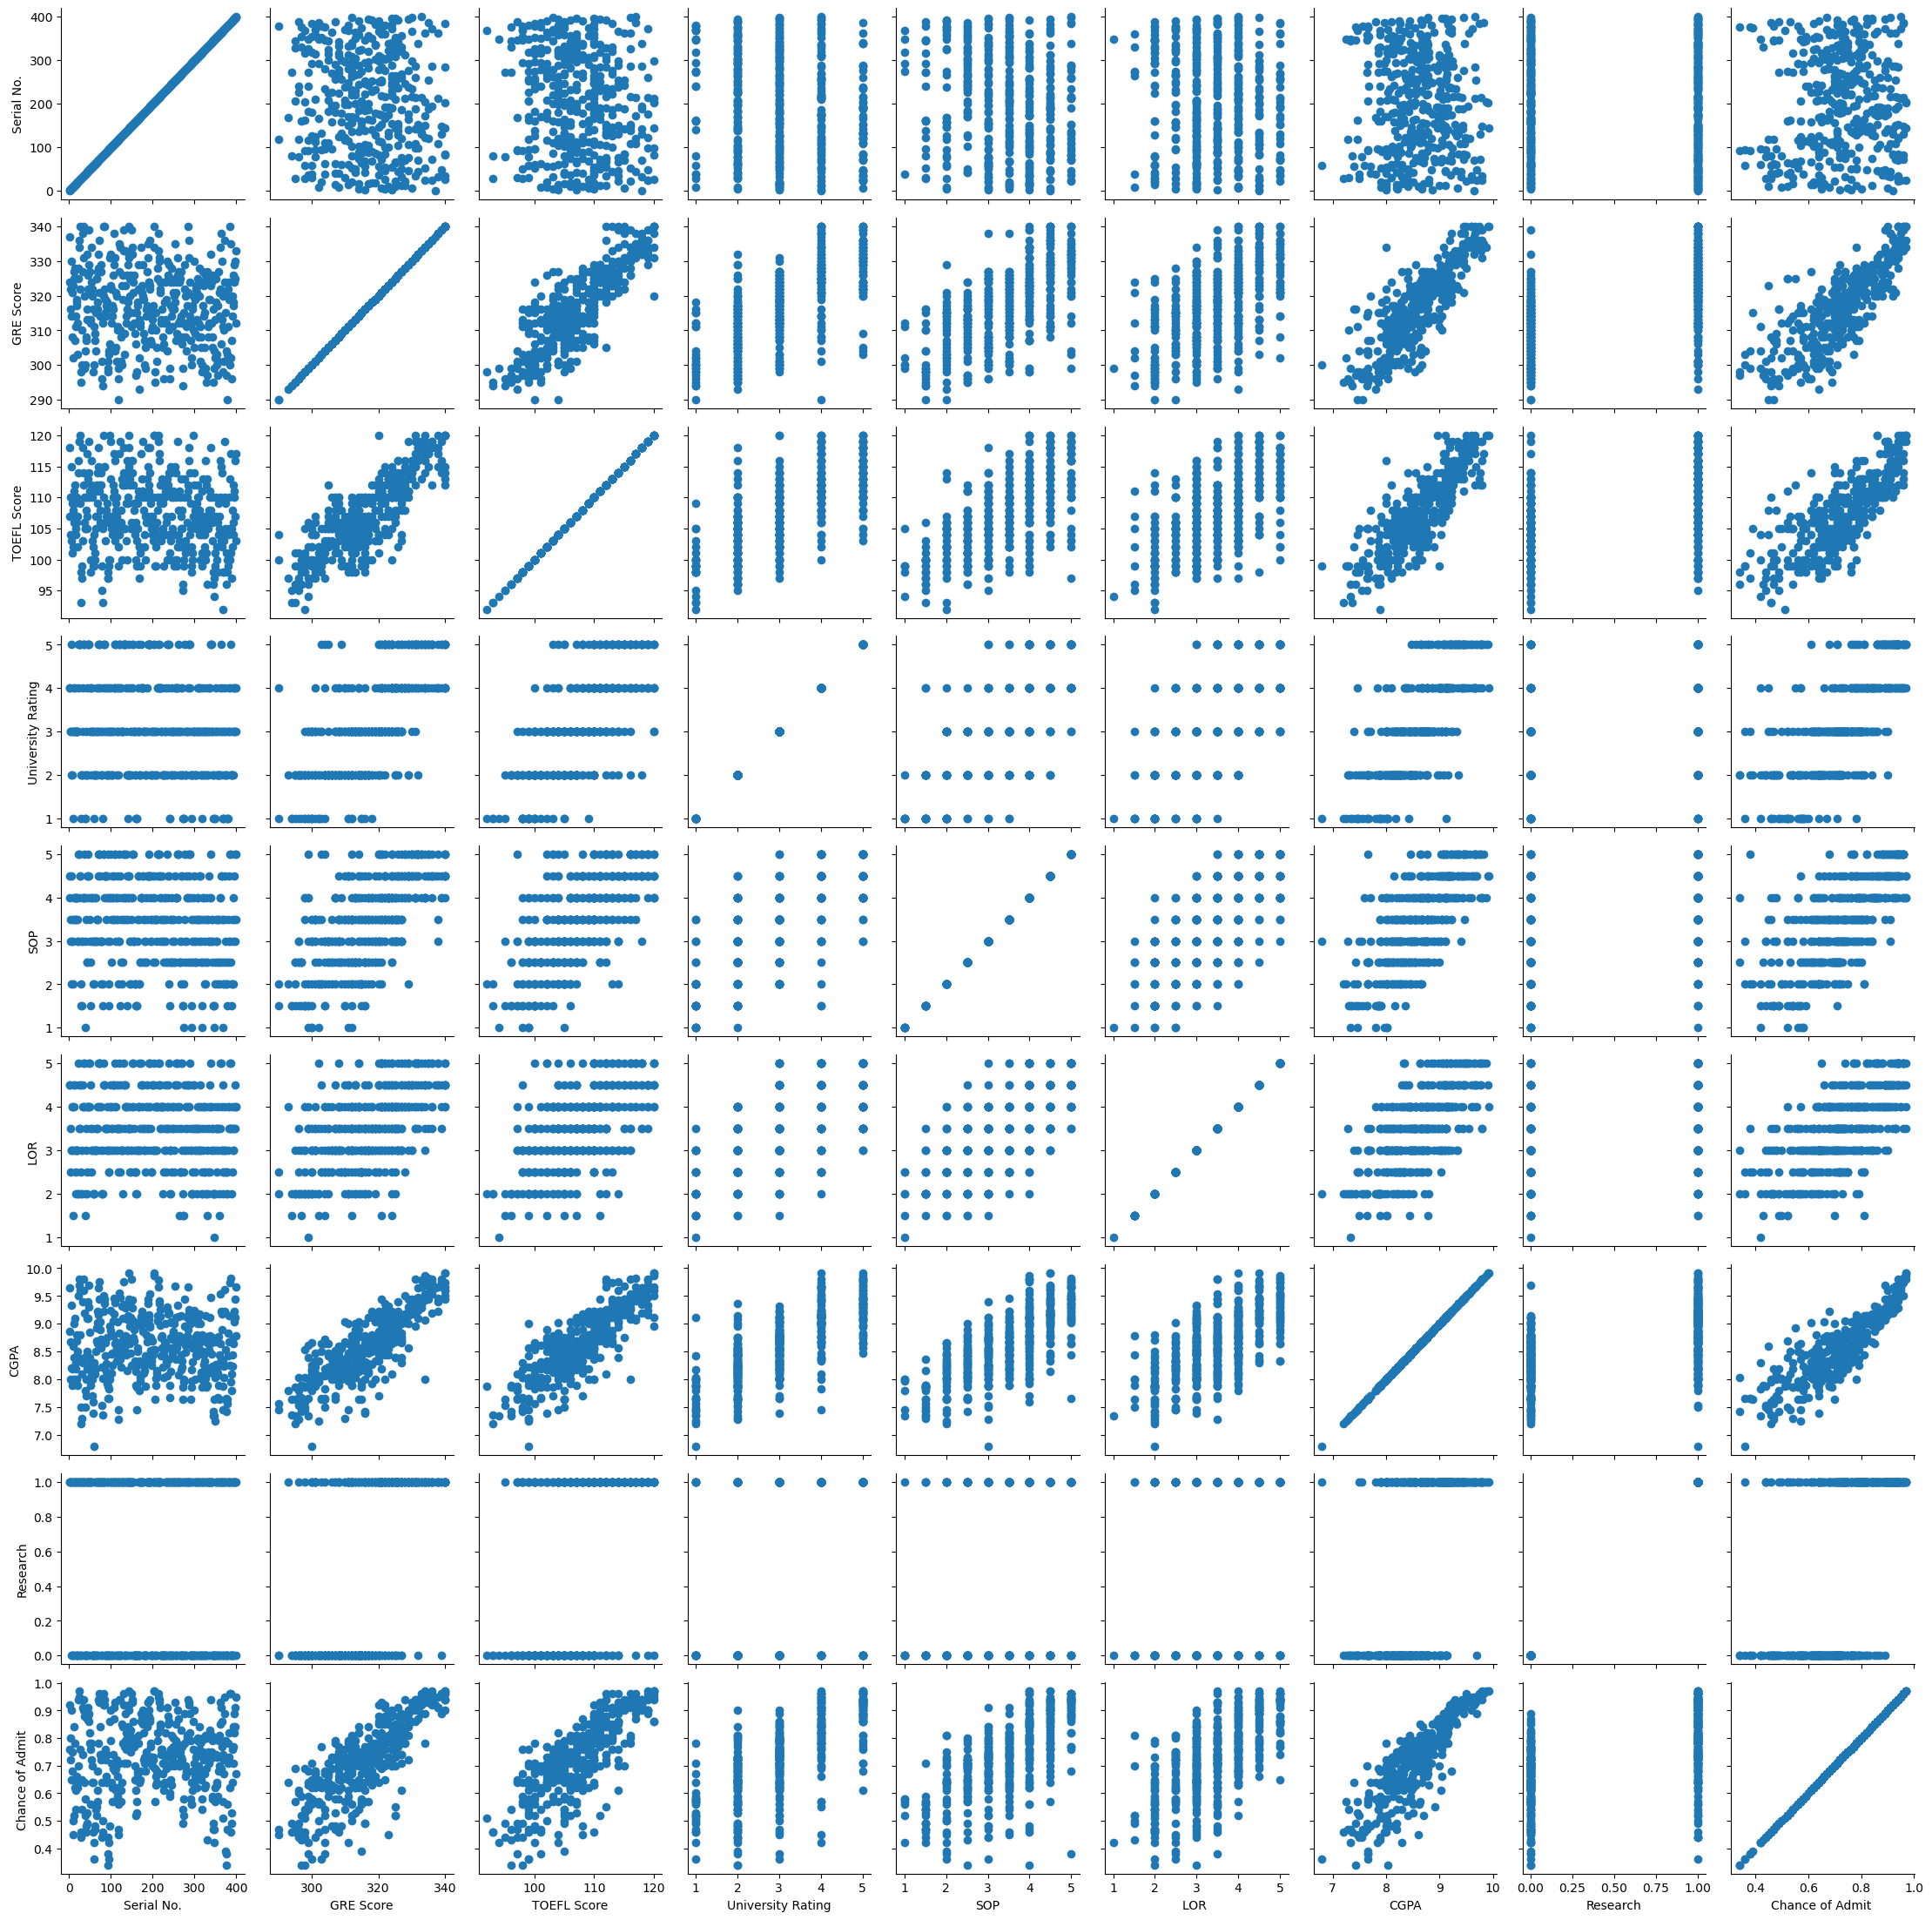

In [31]:
data_p=sns.PairGrid(data)
data_p.map(plt.scatter)

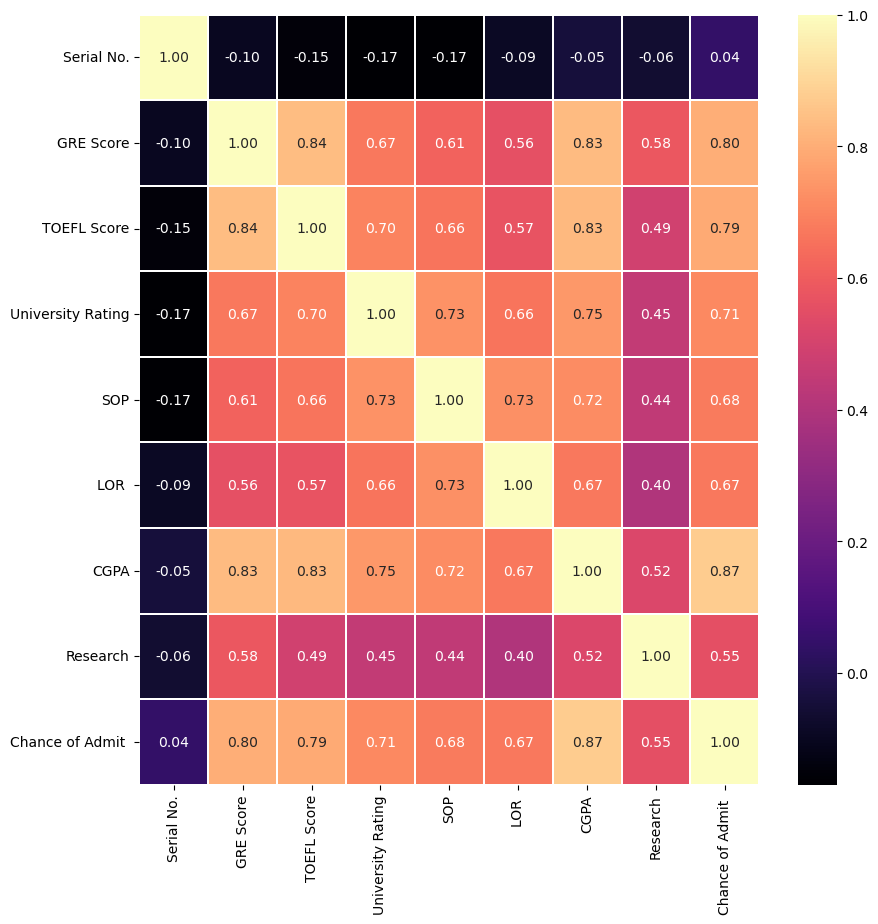

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

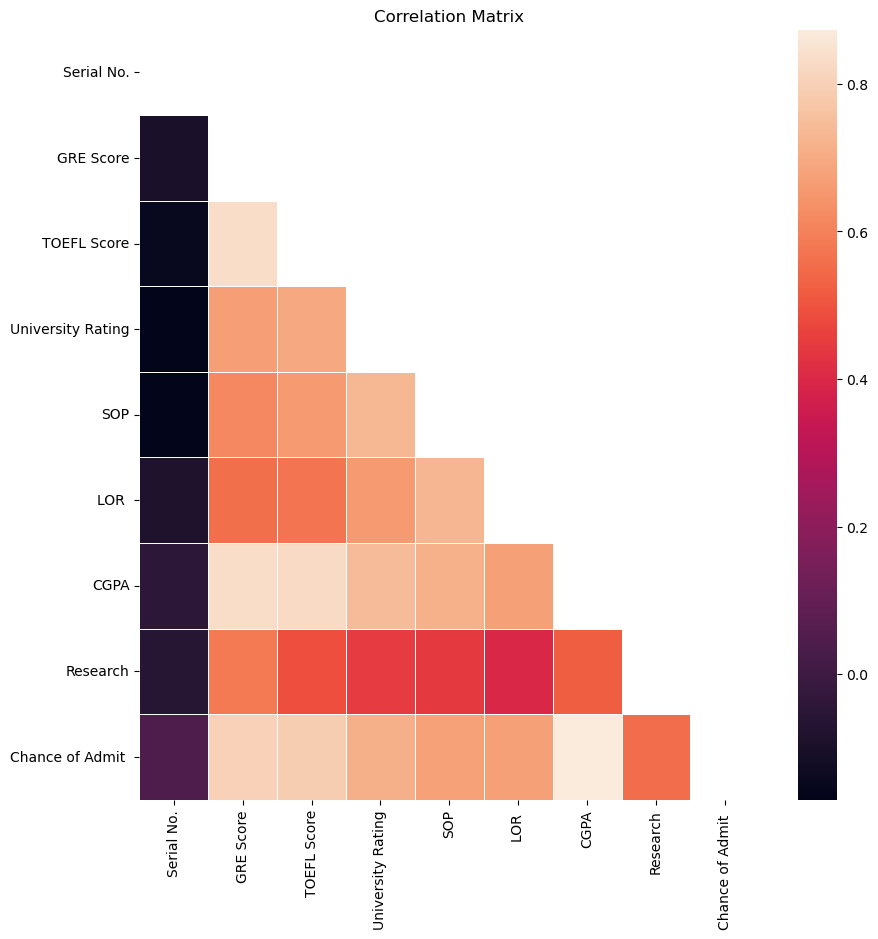

In [35]:
corr=data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(corr,mask=mask,cmap="rocket",linewidths=.5)
plt.show()

In [8]:
import seaborn as sns

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

<AxesSubplot:xlabel='University Rating', ylabel='count'>

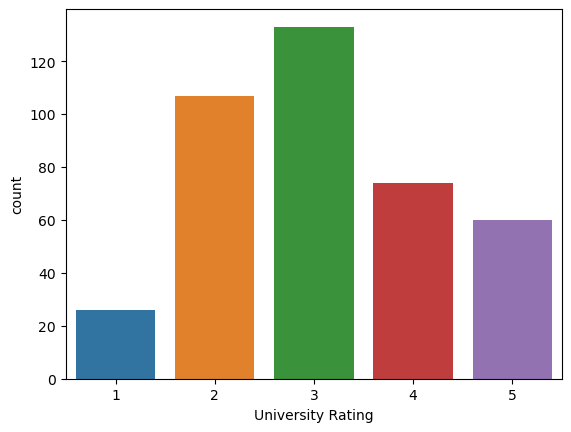

In [18]:
data.Research.value_counts()
sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

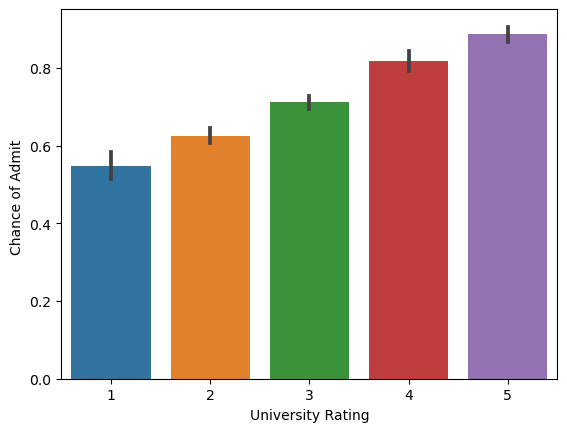

In [40]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

# Splitting Independent and Dependent datas

In [41]:
x = data.iloc[:, :-1]
y = data['Chance of Admit ']
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [42]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# Splitting the data

In [43]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Model Building

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [45]:
model.score(x_test,y_test)

0.8035481726008386

In [46]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(x_test)

In [47]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [48]:
from sklearn.linear_model._logistic import LogisticRegression
lore = LogisticRegression(random_state=0, max_iter=1000)
lr_model = lore.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=1)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

# Traning The Model  

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_predict = model.predict(x_test)
score=model.score(x_test, y_test)
print(score)

0.827710242084957


In [56]:
print(y_predict[0:5])
print(y_test[0:5])

[0.74829155 0.67046093 0.81521024 0.80935301 0.85037486]
398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
Name: Chance of Admit , dtype: float64
